### Conversion Rate - Improve Revenue

### Data Description

##### Columns: 

# Recommendations - Based on Analysis and Visaulizations

# Recommendations - Based on Predictive Model

# Code

In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, recall_score,f1_score, roc_curve,auc,accuracy_score
from sklearn.ensemble import RandomForestClassifier

C:\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
#Read Data
conversions_df=pd.read_csv("conversion_data.csv")

#### Summarize Data

In [3]:
conversions_df.head()

,country,age,new_user,source,total_pages_visited,converted
0,UK,25,1,Ads,1,0
1,US,23,1,Seo,5,0
2,US,28,1,Seo,4,0
3,China,39,1,Seo,5,0
4,US,30,1,Seo,6,0


In [4]:
conversions_df.shape

(316200, 6)

In [5]:
conversions_df.describe()

,age,new_user,total_pages_visited,converted
count,316200.000000,316200.000000,316200.000000,316200.000000
mean,30.569858,0.685465,4.872966,0.032258
std,8.271802,0.464331,3.341104,0.176685
min,17.000000,0.000000,1.000000,0.000000
25%,24.000000,0.000000,2.000000,0.000000
50%,30.000000,1.000000,4.000000,0.000000
75%,36.000000,1.000000,7.000000,0.000000
max,123.000000,1.000000,29.000000,1.000000


In [6]:
conversions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316200 entries, 0 to 316199
Data columns (total 6 columns):
country                316200 non-null object
age                    316200 non-null int64
new_user               316200 non-null int64
source                 316200 non-null object
total_pages_visited    316200 non-null int64
converted              316200 non-null int64
dtypes: int64(4), object(2)
memory usage: 14.5+ MB


#### Visualization

What is the conversion rate?

In [7]:
#Observation count by label
conversions_df.converted.value_counts()

0    306000
1     10200
Name: converted, dtype: int64

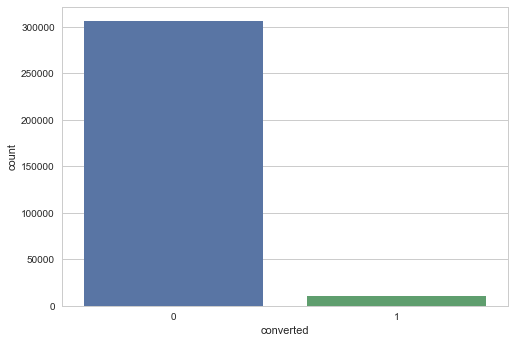

In [8]:
#Plot label category count
sns.countplot(conversions_df.converted)

In [9]:
#Conversion Rate
conversion_rate=(conversions_df[conversions_df.converted==1].size/conversions_df.converted.size)*100
print("Conversion Rate = ",conversion_rate, " %")

Conversion Rate =  19.3548387097  %


********************************************************************************************************************************

How is the sample geographically distributed?

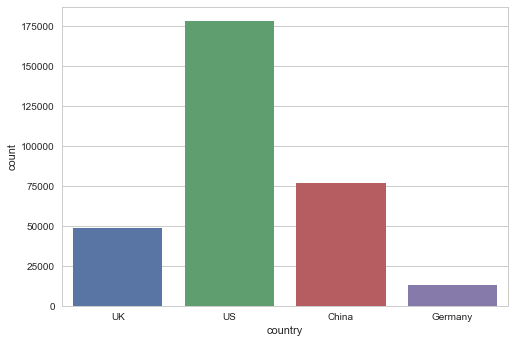

In [10]:
#Plot observation count by country
sns.countplot(conversions_df.country)

In [11]:
#User Rate by Country
country_rate=(conversions_df.country.value_counts()/conversions_df.country.size)*100
country_rate

US         56.322581
China      24.225806
UK         15.322581
Germany     4.129032
Name: country, dtype: float64

**********************************************************************************

What is the conversion rate in each country?

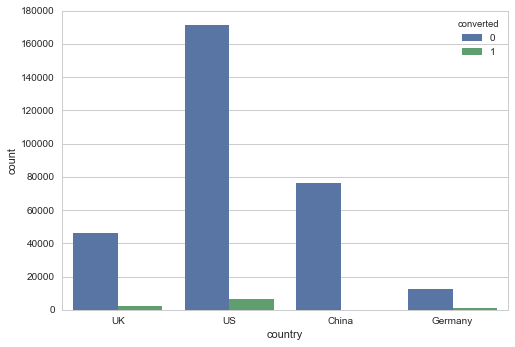

In [12]:
#Plot observation count by country and converted
sns.countplot(conversions_df.country, hue=conversions_df.converted)

In [13]:
#Calculate conversion rate by country
countryconversion_rate=conversions_df[conversions_df['converted']==1].country.value_counts()/conversions_df.country.value_counts()
countryconversion_rate

China      0.001332
Germany    0.062500
UK         0.052632
US         0.037801
Name: country, dtype: float64

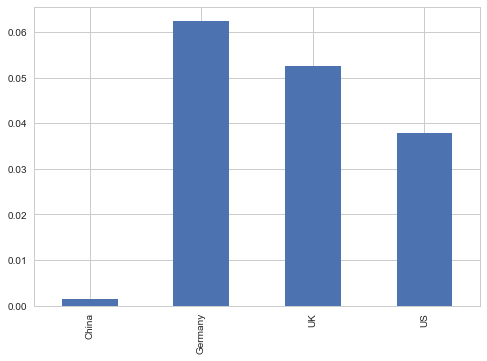

In [14]:
countryconversion_rate.plot('bar')

Germany has the highest conversion rate

***********************************************************************************************

Which marketing channel gives highest conversion rate?

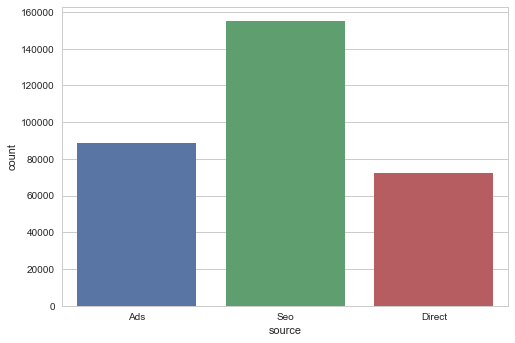

In [15]:
#Plot observation count by Marketing channel
sns.countplot(conversions_df.source)

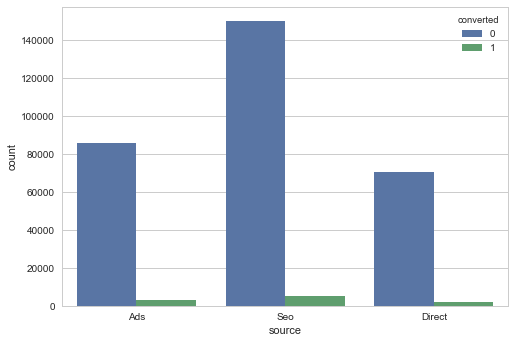

In [16]:
#Plot observation count by Marketing channel and converted
sns.countplot(conversions_df.source, hue=conversions_df.converted)

In [17]:
#Calculate marketing channel conversion rate
sourceconversion_rate=conversions_df[conversions_df['converted']==1].source.value_counts()/conversions_df.source.value_counts()
sourceconversion_rate

Seo       0.032895
Ads       0.034483
Direct    0.028169
Name: source, dtype: float64

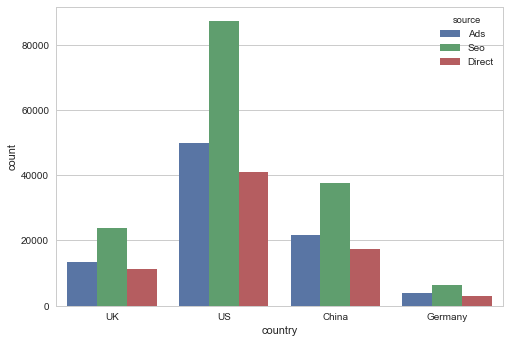

In [18]:
#Conversion Rate - Marketing Channel by Country
sns.countplot(conversions_df.country, hue=conversions_df.source)

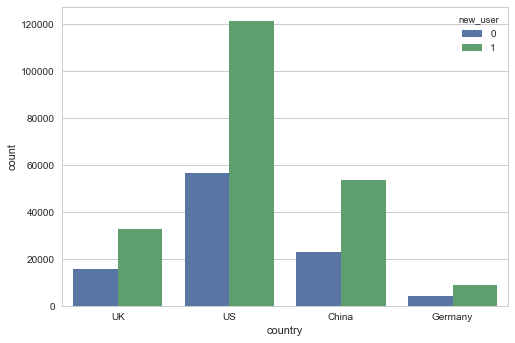

In [19]:
#Conversion Rate - Marketing Channel by Use
sns.countplot(conversions_df.country, hue=conversions_df.new_user)

*********************************************************************************************************

Is conversion higher among new users or established users?

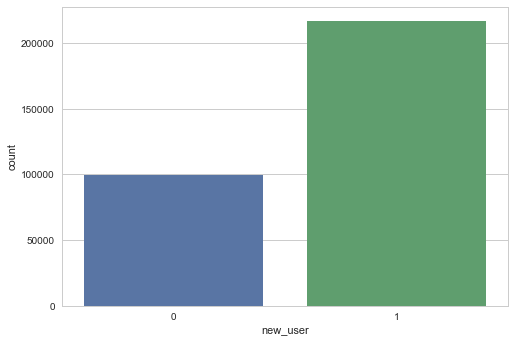

In [20]:
#Plot observation count by user type
sns.countplot(conversions_df.new_user)

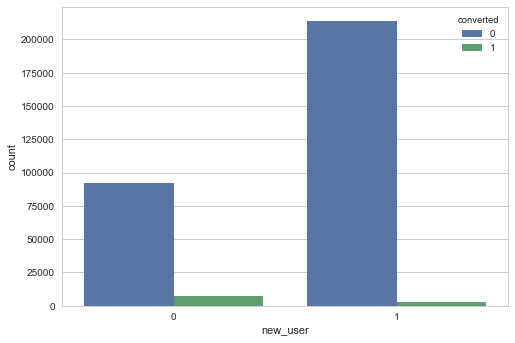

In [21]:
#Plot observation count by user type and conversion
sns.countplot(conversions_df.new_user,hue=conversions_df.converted)

In [22]:
#Calculate user type conversion rate
userconversion_rate=conversions_df[conversions_df['converted']==1].new_user.value_counts()/conversions_df.new_user.value_counts()
userconversion_rate

0    0.072002
1    0.014021
Name: new_user, dtype: float64

Conversion rate of returning users are significantly higher than the new users. We have to explore why we have a low conversion among new users.

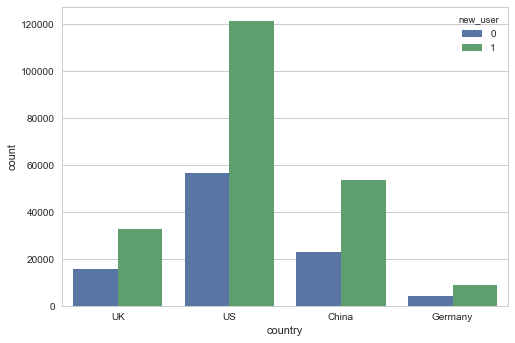

In [23]:
#What is the new user rate among countries
#Plot observation count by user type and country
sns.countplot(conversions_df.country,hue=conversions_df.new_user)

******************************************************************************************

What is the distribution of age groups in the dataset?

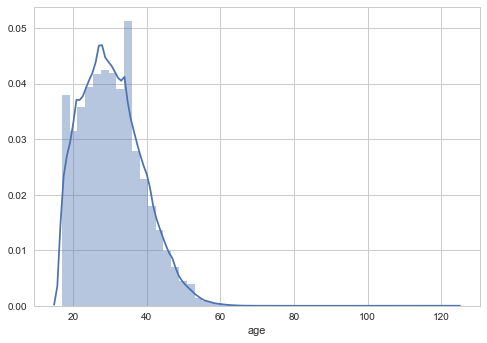

In [24]:
#Plot histogram of age
sns.distplot(conversions_df.age)

In [25]:
#Binning:
def binning(col, cut_points, labels=None):
  #Define min and max values:
  minval = col.min()
  maxval = col.max()

  #create list by adding min and max to cut_points
  break_points = [minval] + cut_points + [maxval]

  #if no labels provided, use default labels 0 ... (n-1)
  if not labels:
    labels = range(len(cut_points)+1)

  #Binning using cut function of pandas
  colBin = pd.cut(col,bins=break_points,labels=labels,include_lowest=True)
  return colBin
#Binning age:
cut_points = [20,25,30,35,40]
labels = ["Less Than 20","20-25","25-30","30-35","35-40","Greater Than 40"]
conversions_df["age_group"] = binning(conversions_df["age"], cut_points, labels)

In [26]:
conversions_df.head()

,country,age,new_user,source,total_pages_visited,converted,age_group
0,UK,25,1,Ads,1,0,20-25
1,US,23,1,Seo,5,0,20-25
2,US,28,1,Seo,4,0,25-30
3,China,39,1,Seo,5,0,35-40
4,US,30,1,Seo,6,0,25-30


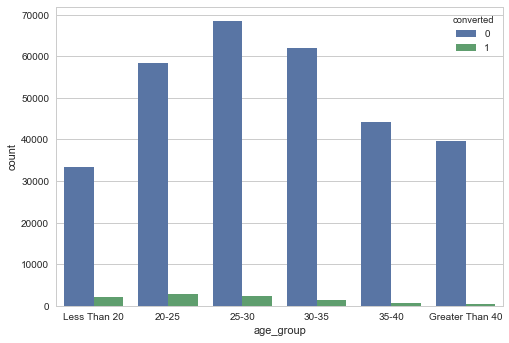

In [27]:
#Age Group - Conversion
sns.countplot(conversions_df.age_group,hue=conversions_df.converted)

In [28]:
#Age Group - Conversion rate 
ageconversion_rate=conversions_df[conversions_df['converted']==1].age_group.value_counts()/conversions_df.age_group.value_counts()*100
ageconversion_rate

20-25              4.750663
25-30              3.365792
30-35              2.343516
35-40              1.703076
Greater Than 40    1.037924
Less Than 20       6.272492
Name: age_group, dtype: float64

There is a high conversion rate in age groups less than 30. Market to this base.

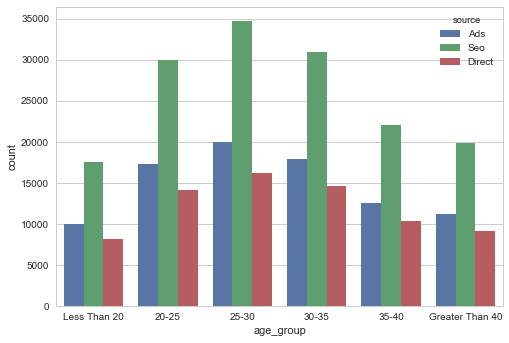

In [29]:
#Age Group - by Source 
sns.countplot(conversions_df.age_group,hue=conversions_df.source)

In [30]:
# Conversion by age group and source
pd.crosstab(conversions_df[conversions_df['converted']==1].age_group,conversions_df[conversions_df['converted']==1].source).apply(lambda x:x/x.sum())*100

source,Ads,Direct,Seo
age_group,,,
Less Than 20,21.862745,20.882353,22.274510
20-25,29.477124,29.117647,27.882353
25-30,22.385621,23.235294,24.039216
30-35,14.607843,14.362745,14.627451
35-40,7.549020,8.480392,7.058824
Greater Than 40,4.117647,3.921569,4.117647


Age by Source - Conversation Rate doesnt show a variation by source. Within an age group the sources have the same conversion rate.

In [31]:
#Age Group by New User
pd.crosstab(conversions_df[conversions_df['converted']==1].age_group,conversions_df[conversions_df['converted']==1].new_user).apply(lambda x:x/x.sum())*100

new_user,0,1
age_group,,
Less Than 20,21.868454,21.882198
20-25,28.557464,28.726555
25-30,23.725737,22.573215
30-35,14.439324,14.873314
35-40,7.512917,7.436657
Greater Than 40,3.896104,4.508062


In [32]:
#Age Group by Country
pd.crosstab(conversions_df[conversions_df['converted']==1].age_group,conversions_df[conversions_df['converted']==1].country).apply(lambda x:x/x.sum())*100

country,China,Germany,UK,US
age_group,,,,
Less Than 20,20.588235,23.406863,22.431373,21.494355
20-25,31.372549,26.593137,28.392157,28.891860
25-30,27.450980,23.529412,23.882353,23.113488
30-35,16.666667,14.950980,14.196078,14.631610
35-40,0.980392,7.843137,7.137255,7.679739
Greater Than 40,2.941176,3.676471,3.960784,4.188948


***************************************************************************************************************

How many pages does a user visit in a session?

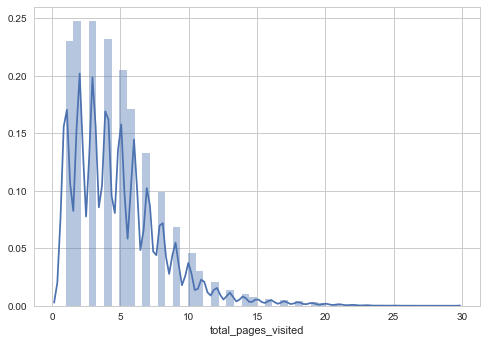

In [33]:
#Plot histogram of total_pages_visited
sns.distplot(conversions_df.total_pages_visited)

*******************************************************************

In [34]:
correlation=conversions_df.corr()

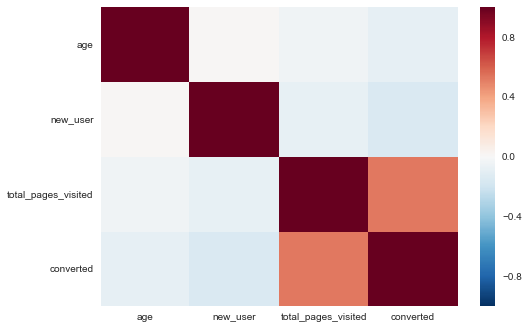

In [35]:
sns.heatmap(correlation)

****************************************************************************

#### Remove Outliers

In [36]:
conversions_df=conversions_df[conversions_df.age<=90]
conversions_df.shape

(316198, 7)

#### Data Preprocessing

In [37]:
#Get dummies for categorical variables
conversions_df=pd.get_dummies(conversions_df)
conversions_df.head()

,age,new_user,total_pages_visited,converted,country_China,country_Germany,country_UK,country_US,source_Ads,source_Direct,source_Seo,age_group_Less Than 20,age_group_20-25,age_group_25-30,age_group_30-35,age_group_35-40,age_group_Greater Than 40
0,25,1,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0
1,23,1,5,0,0,0,0,1,0,0,1,0,1,0,0,0,0
2,28,1,4,0,0,0,0,1,0,0,1,0,0,1,0,0,0
3,39,1,5,0,1,0,0,0,0,0,1,0,0,0,0,1,0
4,30,1,6,0,0,0,0,1,0,0,1,0,0,1,0,0,0


#### Train Test Split Cross Validation

In [38]:
X=conversions_df.ix[:, conversions_df.columns != 'converted']
y=conversions_df.converted
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

#### Standard Scaler

In [39]:
stdsc=StandardScaler()
X_train_std=stdsc.fit_transform(X_train)
X_test_std=stdsc.fit_transform(X_test)

#### Implement Random Forest to assess factor importances

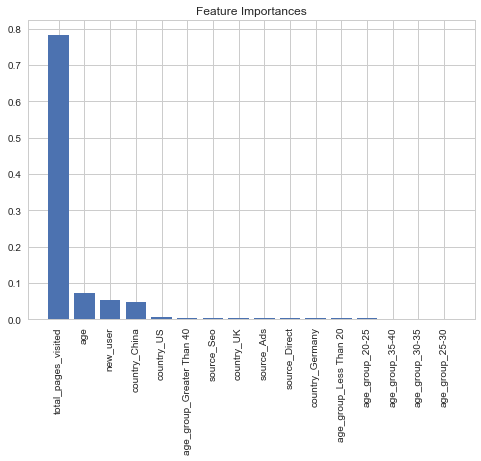

In [40]:
#Ramdom Forest
rf=RandomForestClassifier(criterion='entropy',random_state=1,n_jobs=2)
rf.fit(X_train,y_train)
features=X.columns
importances=rf.feature_importances_
indices=np.argsort(importances)[::-1]
plt.title('Feature Importances')
plt.bar(range(X_train.shape[1]),importances[indices])
plt.xticks(range(X_train.shape[1]),features[indices],rotation=90)
plt.show()

#### Run predictive model

In [41]:
#Perform logistic regression
lr=LogisticRegression(C=1000.0,random_state=0)
lr.fit(X_train_std,y_train)

LogisticRegression(C=1000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=0,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [42]:
y_pred=lr.predict(X_test)

#### Evaluate Performance Metrics

confmat=confusion_matrix(y_test,y_pred)
confmat

Confusion Matrix show high rate of True Positives

In [43]:
precisionscore=precision_score(y_test,y_pred)
precisionscore

0.4812918471839307

In [44]:
recallscore=recall_score(y_test,y_pred)
recallscore

0.81088254810882543

In [45]:
f1score=f1_score(y_test,y_pred)
f1score

0.60405338606030656

In [46]:
accuracyscore=accuracy_score(y_test,y_pred)
accuracyscore

0.96622390891840604

The model gives a high accuracy score of 95%.

*************************************************************************************************************************